# Autore: Federico Marra
# Matricola: 7025997
# Mail: [federico.marra@edu.unifi.it](mailto:federico.marra@edu.unifi.it)
# [Link al GitHub](https://github.com/federicomarra/asd-lab)

## Esercizio 2 Laboratorio di Algoritmi

#### Notebook per confronto tra gli algoritmi di ordinamento Insertion-Sort e Quick-Sort
Per fare questo dovremo scrivere un notebook Jupyter che permetta di confrontare i due algoritmi verificando vantaggi e svantaggi degli algoritmi:
1. vengono generati i dati di test (esecuzioni diverse devono generare dati diversi)
2. vengono eseguiti i test e generati i risultati
3. la documentazione del codice e la descrizione degli esperimenti devono essere in Markdown all’interno del notebook stesso

## Indice
1. [Introduzione](#Introduzione)
2. [Algoritmi di ordinamento](#Algoritmi-di-ordinamento)
   - [Insertion sort](#Insertion-sort)
       1. [Complessità](#Complessità)
       2. [Correttezza](#Correttezza)
       3. [Stabilità](#Stabilità)
   - [Quick sort](#Quick-sort)
       1. [Complessità](#Complessità-i)
       2. [Correttezza](#Correttezza-i)
       3. [Stabilità](#Stabilità-i)
3. [Test](#Test)
    - [Librerie utilizzate](#Librerie-utilizzate)
    - [Funzioni per il testing](#Funzioni-per-il-testing)
    - [Esecuzione dei test](#Esecuzione-dei-test)
4. [Generazione delle tabelle dei tempi di esecuzione](#Generazione-delle-tabelle-dei-tempi-di-esecuzione)
5. [Generazione dei grafici](#Generazione-dei-grafici)
6. [Osservazioni finali](#Osservazioni-finali)
   - [Caso peggiore: valori ordinati inversamente](#Caso-peggiore:-valori-ordinati-inversamente)
   - [Caso medio: valori casuali)](#Caso-medio:-valori-casuali)
   - [Caso migliore: valori già ordinati correttamente](#Caso-migliore:-valori-già-ordinati-correttamente)
7. [Ulteriori osservazioni e conclusioni](#Ulteriori-osservazioni-e-conclusioni)
8. [Bibliografia](#Bibliografia)

# Introduzione
Questo notebook è stato creato per confrontare le prestazioni degli algoritmi di ordinamento Insertion-Sort e Quick-Sort.
L'obiettivo principale è la comprensione delle differenze di prestazione tra i due algoritmi, in particolare in base alla dimensione dell'array su cui vengono eseguiti e dal tipo di array, ovvero se rappresenta il caso peggiore, medio o migliore.
Per l'esecuzione dei test e del rendering grafico dei risultati verranno utilizzate le librerie Matplotlib e Random:
- **matplotlib**: usato per generare grafici e tabelle in modo tale di analizzare visivamente le prestazioni dei due algoritmi
- **random**: usato per generare grafici e tabelle in modo tale di analizzare visivamente le prestazioni dei due algoritmi

# Algoritmi di ordinamento

## Insertion sort

![](https://upload.wikimedia.org/wikipedia/commons/2/24/Sorting_insertion_sort_anim.gif)

In [344]:
def insertion_sort(array): #iterativo
    for j in range(1, len(array)):
        key = array[j]
        i = j - 1
        while i >= 0 and array[i] > key:
            array[i + 1] = array[i]
            i = i - 1
        array[i + 1] = key
    return array

### Complessità
La complessità dell'algoritmo di Insertion-Sort è pari a $O(n^2)$, dove $n$ è la dimensione dell'array su cui viene eseguito.
### Correttezza
L'algoritmo di Insertion-Sort è corretto in quanto:
- **Inizializzazione**: all'inizio di ogni iterazione del ciclo for, l'array $A[1..j-1]$ è ordinato e contiene gli stessi elementi di $A[1..j-1]$.
- **Mantenimento**: ogni iterazione del ciclo for mantiene l'invariante di ciclo. Se $A[1..j-1]$ è ordinato e contiene gli stessi elementi di $A[1..j-1]$, allora il ciclo while trova la posizione corretta per $A[j]$ e inserisce il valore in quella posizione.
- **Terminazione**: quando il ciclo for termina, $j = n + 1$. Per l'invariante di ciclo, questo implica che $A[1..n]$ è ordinato e contiene gli stessi elementi di $A[1..n]$, ovvero l'array è ordinato correttamente.
- **Correttezza**: l'algoritmo è corretto in quanto l'inizializzazione, il mantenimento e la terminazione sono verificate.
- **Complessità**: l'algoritmo ha complessità $O(n^2)$, dove $n$ è la dimensione dell'array su cui viene eseguito.
- **Stabilità**: l'algoritmo è stabile in quanto gli elementi uguali non vengono scambiati di posizione.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.
- **In-Place**: l'algoritmo è in-place in quanto non necessita di memoria aggiuntiva per l'esecuzione.
- **Online**: l'algoritmo è online in quanto non necessita di conoscere l'intero input per poter iniziare l'esecuzione.
- **Sottosequenze**: l'algoritmo non è ottimo per sottosequenze in quanto non è possibile dividere l'input in sottosequenze e ordinare ogni sottosequenza in modo indipendente.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.
- **In-Place**: l'algoritmo è in-place in quanto non necessita di memoria aggiuntiva per l'esecuzione.
- **Online**: l'algoritmo è online in quanto non necessita di conoscere l'intero input per poter iniziare l'esecuzione.
- **Sottosequenze**: l'algoritmo non è ottimo per sottosequenze in quanto non è possibile dividere l'input in sottosequenze e ordinare ogni sottosequenza in modo indipendente.
- **Adattività**: l'algoritmo è adattivo in quanto se l'array è già ordinato correttamente, l'algoritmo ha complessità $O(n)$.

### Stabilità
L'algoritmo di Insertion-Sort è stabile in quanto gli elementi uguali non vengono scambiati di posizione.

# Quick sort
Quick sort è un algoritmo di ordinamento basato sul paradigma del divide et impera, che consiste nel:
- **Divide:** partiziona l'array $A[p...r]$ in due sottoarray $A[p...q-1]$ e $A[q+1...r]$, in modo che tutti gli elementi del primo array siano ≤$A[q]$ e tutti quelli del secondo siano >$A[q]$. Il calcolo del valore di $q$ viene eseguito all'interno di ```partition```
- **Impera:** ordina i due sottoarray $A[p...q-1]$ e $A[q+1...r]$ chiamando ricorsivamente ```quick_sort```
![](https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif)

In [345]:
def quick_sort(array, p, r): #ricorsivo
    if p < r:
        q = partition(array, p, r)
        quick_sort(array, p, q - 1)
        quick_sort(array, q + 1, r)
    return array

def partition(array, p, r):
    x = array[r]
    i = p - 1
    for j in range(p, r):
        if array[j] <= x:
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[r] = array[r], array[i + 1]
    return i + 1

# Complessità
La complessità dell'algoritmo di quick sort è
- $O(n^2)$ nel caso peggiore
- $O(n \log n)$ nel caso medio
- $O(n \log n)$ nel caso migliore

dove $n$ è la dimensione dell'array su cui viene eseguito.
# Correttezza
L'algoritmo di Quick-Sort è corretto in quanto rispetta le condizioni di correttezza dell'invariante di ciclo nelle 3 condizioni:
1. $A[k]≤x$ se $p≤k≤i$
2. $A[k]>x$ se $i+1≤k≤j-1$
3. $A[k]=x$ se $k=r$
    
- **Inizializzazione**: all'inizio della prima iterazione di ```partition```, $i=p-1$ e $j=p$. Non ci sono valori fra $p$ e $i$, quindi $A[k]≤x$ con $p≤k≤i$ è vera. Non ci sono valori neanche fra $i+1$ e $j-1$, quindi $A[k]>x$ con $i+1≤k≤j-1$ è vera. E infine vista la prima assegnazione nel partition ```x = A[r]```, dunque $x=A[r]$ con $k=r$ è vera. Quindi tutte le condizioni dell'invariante di ciclo sono rispettate.
 
- **Conservazione**: ogni iterazione del ciclo for mantiene l'invariante di ciclo. Se alla j-esima iterazione $A[j]≤x$, viene incrementato $i$ di 1 e fatto uno swap tra $A[i]$ e $A[j]$. Se invece $A[j]>x$ si scorre solamente all'iterazione successiva incrementando $j$. Se $A[p...j-1]$ è ordinato e contiene gli stessi elementi di $A[p...j-1]$, allora il ciclo for trova la posizione corretta per $A[j]$ e inserisce il valore in quella posizione ($A[i]$).
- **Conclusione**: quando il ciclo for termina, $j = r$. Per l'invariante di ciclo, questo implica che $A[p...r]$ è ordinato e contiene tre sottoarray: quelli con elementi ordinati $≤x$, un sottoarray con un solo elemento che contiene $x$ e il sottoarray con gli elementi ordinati  $>x$. Dunque l'array intero è ordinato correttamente.

L'algoritmo è dunque corretto in quanto l'inizializzazione, la conservazione e la conclusione sono verificate.

# Stabilità
L'algoritmo è stabile in quanto gli elementi uguali non vengono scambiati di posizione.

### Altre proprietà
- **In-Place **: l'algoritmo è in-place dunque ordina sul posto poiché non necessita di array aggiuntivi a cui appoggiarsi durante l'esecuzione.
- **In-Line**: l'algoritmo è online in quanto non necessita di conoscere l'intero input per poter iniziare l'esecuzione.
- **Sottosequenze**: l'algoritmo non è ottimo per sottosequenze in quanto non è possibile dividere l'input in sottosequenze e ordinare ogni sottosequenza in modo indipendente.

# Test
Per testare i due algoritmi di ordinamento, verranno utilizzati tre tipi di array:
- con valori random per il caso medio
- già ordinato in modo crescente per il caso migliore
- già ordinato ma in modo descrescente per il caso per il caso peggiore.

Per ogni tipo di array creeremo ```nTests``` array con ognuno che avrà ```nTests``` elementi a partire da ```step```, fino a ```step```*```nTests```
Per limiti del computer, imposteremo come dimensione massima dell'array dell'ultimo test $step*nTests=2500$.
Minore sarà ```nTests``` meno tempo occorrerà per eseguire i test.

In [346]:
#step, nTests = 500, 5
#step, nTests = 250, 10
#step, nTests = 100, 25
#step, nTests = 50, 50
step, nTests = 25, 100
#step, nTests = 10, 250

# Librerie utilizzate
Necessito di diverse librerie per il testing, e la visualizzazione di tabelle e grafici

Libreria ```random``` per la randomizzazione dei valori degli array:

In [347]:
from random import randint as rand

Libreria ```timeit``` per la misurazione dei tempi di esecuzione in millisecondi:

In [348]:
from timeit import default_timer as timer

Libreria ```matplotlib.pyplot``` per la creazione dei grafici:

In [349]:
import matplotlib.pyplot as plt

Libreria ```matplotlib.patches``` per aggiungere delle legende ai grafici:

In [350]:
import matplotlib.patches as mpatch

# Funzioni per il testing:

Funzione per caso medio: creazione array random

In [351]:
def randomArray(n):
    return [rand(1, n) for _ in range(n)]

Funzione per caso migliore: creazione array già ordinato in modo crescente

In [352]:
def sortedArray(n):
    return list(range(1, n + 1, 1))

Funzione per caso peggiore: creazione array già ordinato in modo decrescente

In [353]:
def reversedArray(n):
    return list(range(n, 0, -1))

Funzione che testa per tutta la lista di array contenuti Insertion sort e Quick sort

In [354]:
def test(array):
    timesInsertion = []
    timesQuick = []
    
    for i in range(len(array)):
        print(f"\nTest {i + 1}: dimensione = {len(array[i])}")
        
        start = timer()
        insertion_sort(array[i])
        end = timer()
        timesInsertion.append((end - start)*1000)
        print(f"Insertion sort: {timesInsertion[i]} ms")
        
        start = timer()
        quick_sort(array[i], 0, len(array[i]) - 1)
        end = timer()
        timesQuick.append((end - start)*1000)
        print(f"Quick sort: {timesQuick[i]} ms")
        
    return timesInsertion, timesQuick

# Esecuzione dei test

Generazione array caso medio, migliore e peggiore

In [355]:
AverageArrays = []
BestArrays = []
WorstArrays = []
for i in range(step, step * (nTests + 1), step):
    AverageArrays.append(randomArray(i))
    BestArrays.append(sortedArray(i))
    WorstArrays.append(reversedArray(i))

### Esecuzione test caso medio

In [356]:
AverageTimesInsertion, AverageTimesQuick = test(AverageArrays)


Test 1: dimensione = 25
Insertion sort: 0.0720289972377941 ms
Quick sort: 0.1712140001473017 ms

Test 2: dimensione = 50
Insertion sort: 0.3043289980269037 ms
Quick sort: 0.6366199959302321 ms

Test 3: dimensione = 75
Insertion sort: 0.5593300011241809 ms
Quick sort: 1.4284049975685775 ms

Test 4: dimensione = 100
Insertion sort: 1.4027520010131411 ms
Quick sort: 2.9007129996898584 ms

Test 5: dimensione = 125
Insertion sort: 1.0020350018749014 ms
Quick sort: 2.3570100020151585 ms

Test 6: dimensione = 150
Insertion sort: 2.0404560054885224 ms
Quick sort: 5.346890997316223 ms

Test 7: dimensione = 175
Insertion sort: 3.1929660035530105 ms
Quick sort: 5.652868996548932 ms

Test 8: dimensione = 200
Insertion sort: 3.5650770005304366 ms
Quick sort: 7.95972299965797 ms

Test 9: dimensione = 225
Insertion sort: 4.9949949971050955 ms
Quick sort: 10.532578999118414 ms

Test 10: dimensione = 250
Insertion sort: 6.9732580013806 ms
Quick sort: 30.72981500008609 ms

Test 11: dimensione = 275
Ins

### Esecuzione test caso migliore

In [357]:
BestTimesInsertion, BestTimesQuick = test(BestArrays)


Test 1: dimensione = 25
Insertion sort: 0.02378100180067122 ms
Quick sort: 0.21520600421354175 ms

Test 2: dimensione = 50
Insertion sort: 0.021685002138838172 ms
Quick sort: 0.6438490017899312 ms

Test 3: dimensione = 75
Insertion sort: 0.03959900641348213 ms
Quick sort: 1.4632510064984672 ms

Test 4: dimensione = 100
Insertion sort: 0.0500819951412268 ms
Quick sort: 2.9659450010512955 ms

Test 5: dimensione = 125
Insertion sort: 0.05583700112765655 ms
Quick sort: 4.391665002913214 ms

Test 6: dimensione = 150
Insertion sort: 0.11014399933628738 ms
Quick sort: 6.662419000349473 ms

Test 7: dimensione = 175
Insertion sort: 0.11904400162165985 ms
Quick sort: 4.720572003861889 ms

Test 8: dimensione = 200
Insertion sort: 0.11312100104987621 ms
Quick sort: 8.457398995233234 ms

Test 9: dimensione = 225
Insertion sort: 0.08462800178676844 ms
Quick sort: 8.02326199482195 ms

Test 10: dimensione = 250
Insertion sort: 0.09811799827730283 ms
Quick sort: 17.694270005449653 ms

Test 11: dimensi

### Esecuzione test caso peggiore

In [358]:
WorstTimesInsertion, WorstTimesQuick = test(WorstArrays)


Test 1: dimensione = 25
Insertion sort: 0.07218700193334371 ms
Quick sort: 0.14443200052483007 ms

Test 2: dimensione = 50
Insertion sort: 0.28275699878577143 ms
Quick sort: 0.34545199741842225 ms

Test 3: dimensione = 75
Insertion sort: 0.7912159999250434 ms
Quick sort: 1.4093749996391125 ms

Test 4: dimensione = 100
Insertion sort: 2.5939269980881363 ms
Quick sort: 1.6182639956241474 ms

Test 5: dimensione = 125
Insertion sort: 2.1854259975953028 ms
Quick sort: 3.3124469991889782 ms

Test 6: dimensione = 150
Insertion sort: 3.181207001034636 ms
Quick sort: 5.4258520030998625 ms

Test 7: dimensione = 175
Insertion sort: 3.7992450015735812 ms
Quick sort: 5.842428996402305 ms

Test 8: dimensione = 200
Insertion sort: 7.124923002265859 ms
Quick sort: 10.552674997597933 ms

Test 9: dimensione = 225
Insertion sort: 15.250603995809797 ms
Quick sort: 11.436279004556127 ms

Test 10: dimensione = 250
Insertion sort: 20.76145200408064 ms
Quick sort: 16.255588001513388 ms

Test 11: dimensione =

# Generazione delle tabelle dei tempi di esecuzione

Definisco una funzione che rende in input una lista di colonne di dati, delle intestazioni e un titolo e che stampa una tabella con i dati presi in input

In [359]:
def drawTable(data, title, colorHead="blue", colorCell="lightblue"):
    # Crea un nuovo grafico
    figSizeX = 8
    figSizeY = nTests / 3 + 1
    fig, ax = plt.subplots(figsize=(figSizeX, figSizeY))
    plt.title(title)

    # Unisci le liste di dati come colonne al fine di creare un array bidimensionale di dati: 'data'
    data = np.stack(tuple(data), axis=1)

    # Intestazioni della tabella
    headers = ("N° elementi", "Insertion sort", "Quick sort")

    # Stile tabella
    ax.axis('off')
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_column_width(col=list(range(len(data))))
    table.scale(1, 1.5)
    
    # Colorazione delle celle
    cell_colors = {
        cell: (colorHead, {"weight": "bold"})
        if table[cell].get_text().get_text() in headers
        else (colorCell, {})
        for cell in table._cells
        if cell[0] % 2 == 0
    }
    
    # Imposta il colore delle celle
    for cell, (color, text_props) in cell_colors.items():
        # imposta il colore della cella
        table[cell].set_facecolor(color)
        # imposta le proprietà del testo della cella
        table[cell].set_text_props(**text_props)
        
    plt.show() 

Creo colonne di dati per la creazione delle tabelle

In [360]:
# Generazione colonna tempi caso medio
AverageData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in AverageTimesInsertion],
    ["{:.3e}".format(val) for val in AverageTimesQuick]
]
AverageTitle = "Figura 1: Caso medio: tempi di esecuzione con valori casuali [ms]"

# Generazione tabella tempi caso migliore
BestData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in BestTimesInsertion],
    ["{:.3e}".format(val) for val in BestTimesQuick]
]
BestTitle = "Figura 2: Caso migliore: tempi di esecuzione con lista ordinata [ms]"

# Generazione tabella tempi caso peggiore
WorstData = [
    [i for i in range(step, step * (nTests + 1), step)],
    ["{:.3e}".format(val) for val in WorstTimesInsertion],
    ["{:.3e}".format(val) for val in WorstTimesQuick]
]
WorstTitle = "Figura 3: Caso peggiore: tempi di esecuzione con lista ordinata inversamente [ms]"

### Tabella caso medio

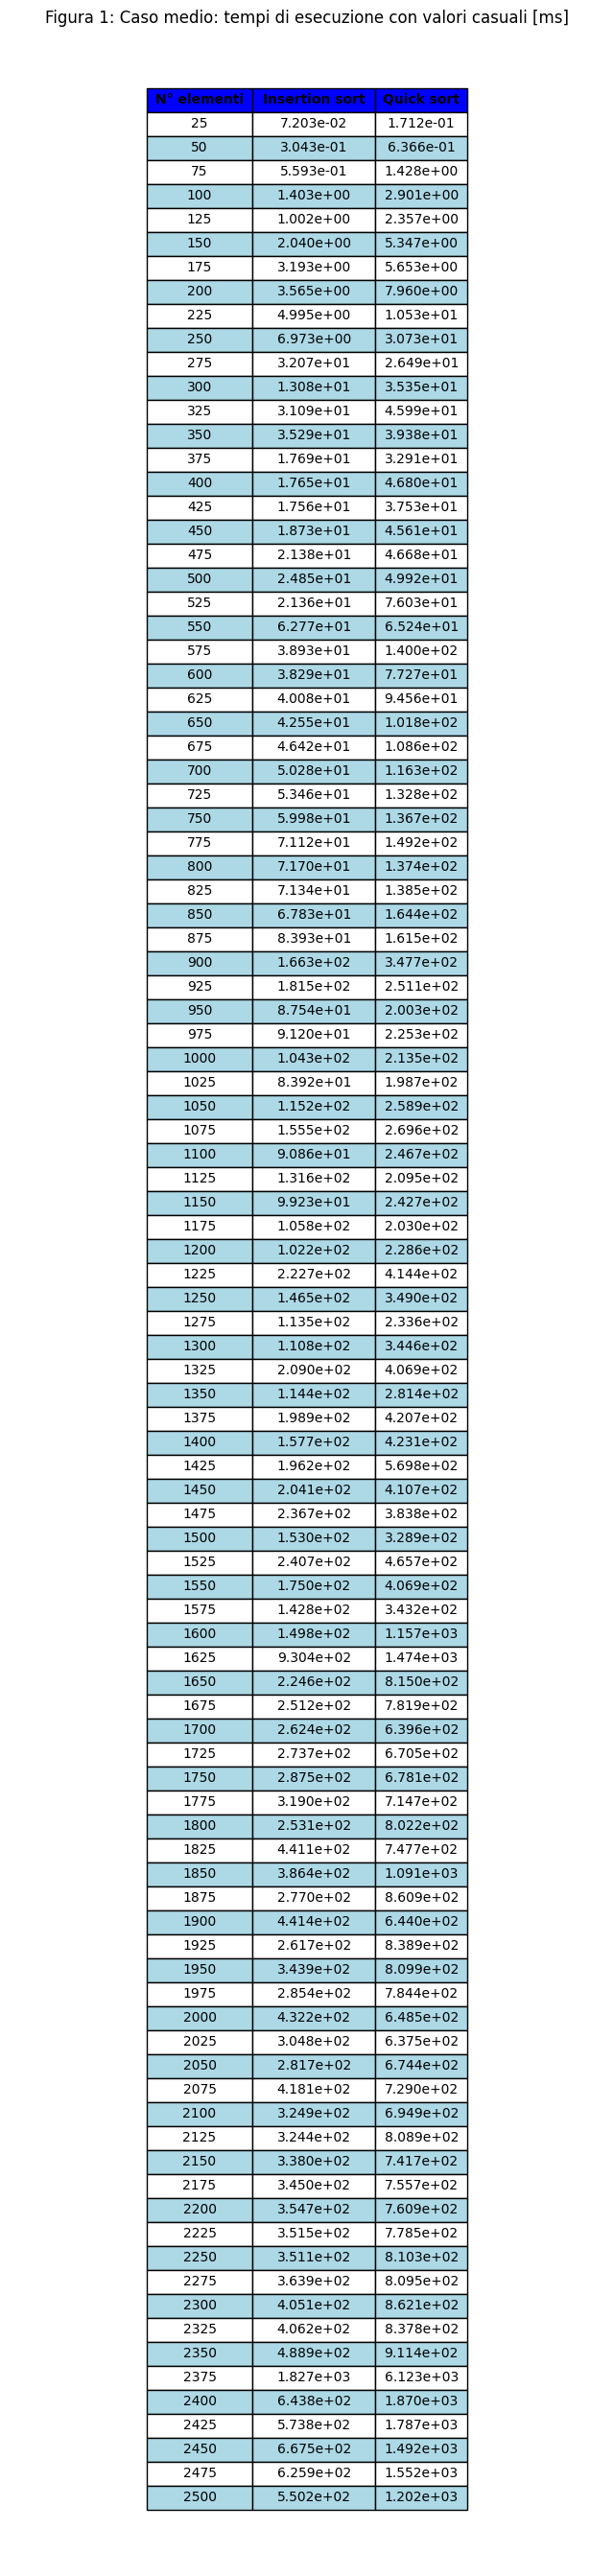

In [361]:
drawTable(AverageData, AverageTitle, "blue", "lightblue")

### Tabella caso migliore

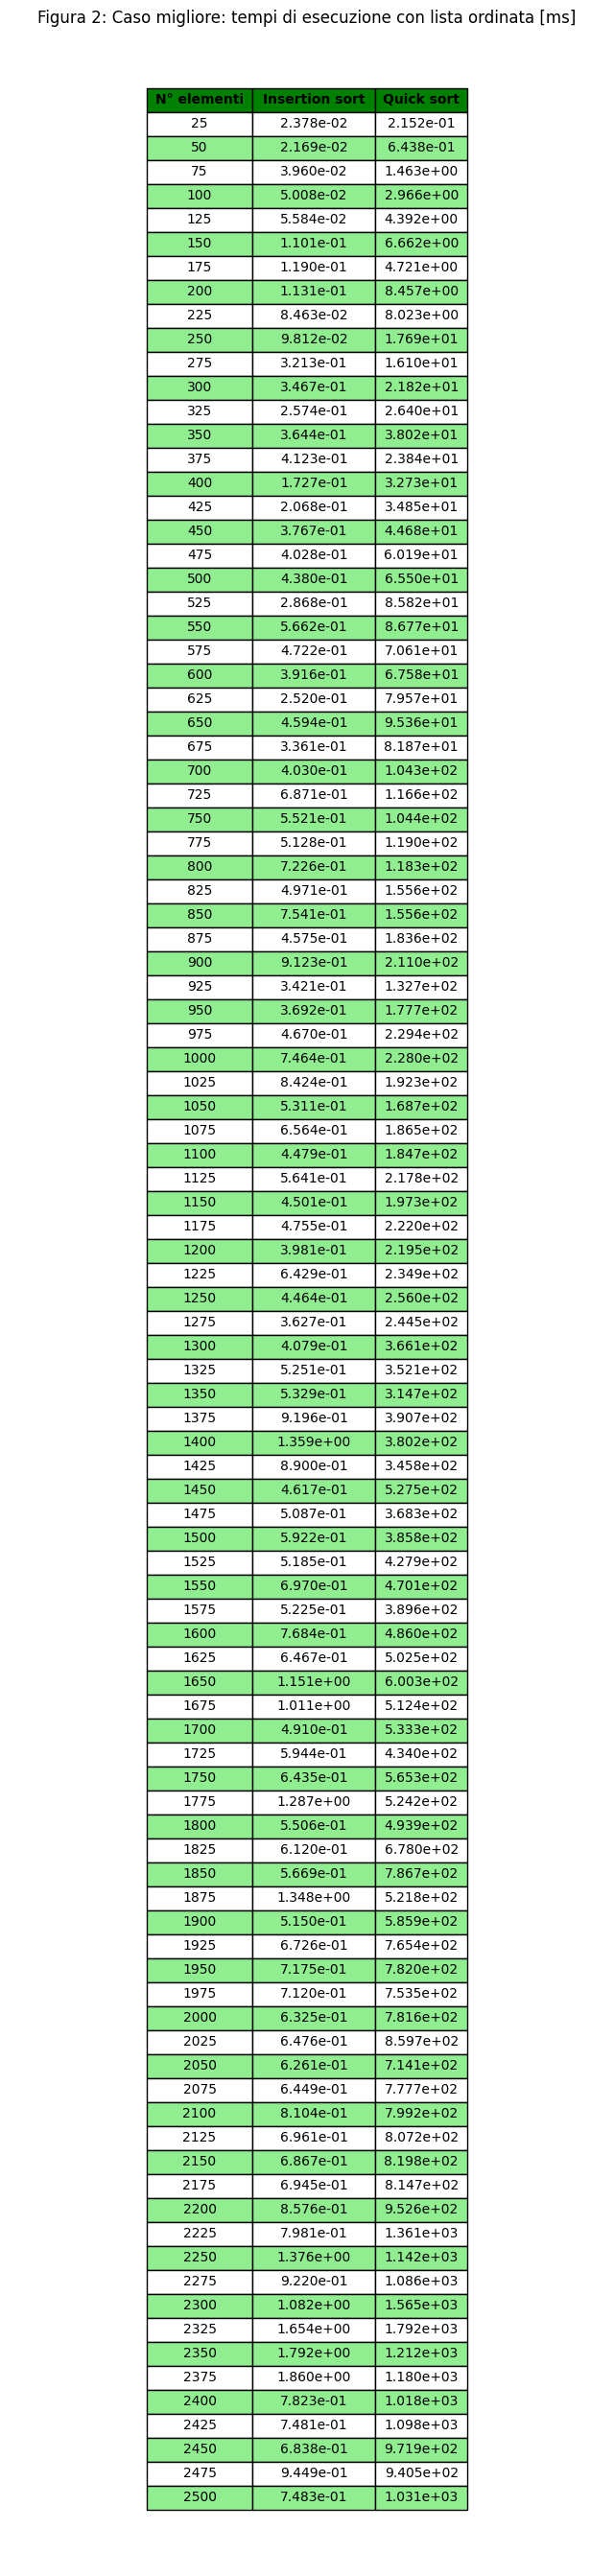

In [362]:
drawTable(BestData, BestTitle, "green", "lightgreen")

### Tabella caso peggiore

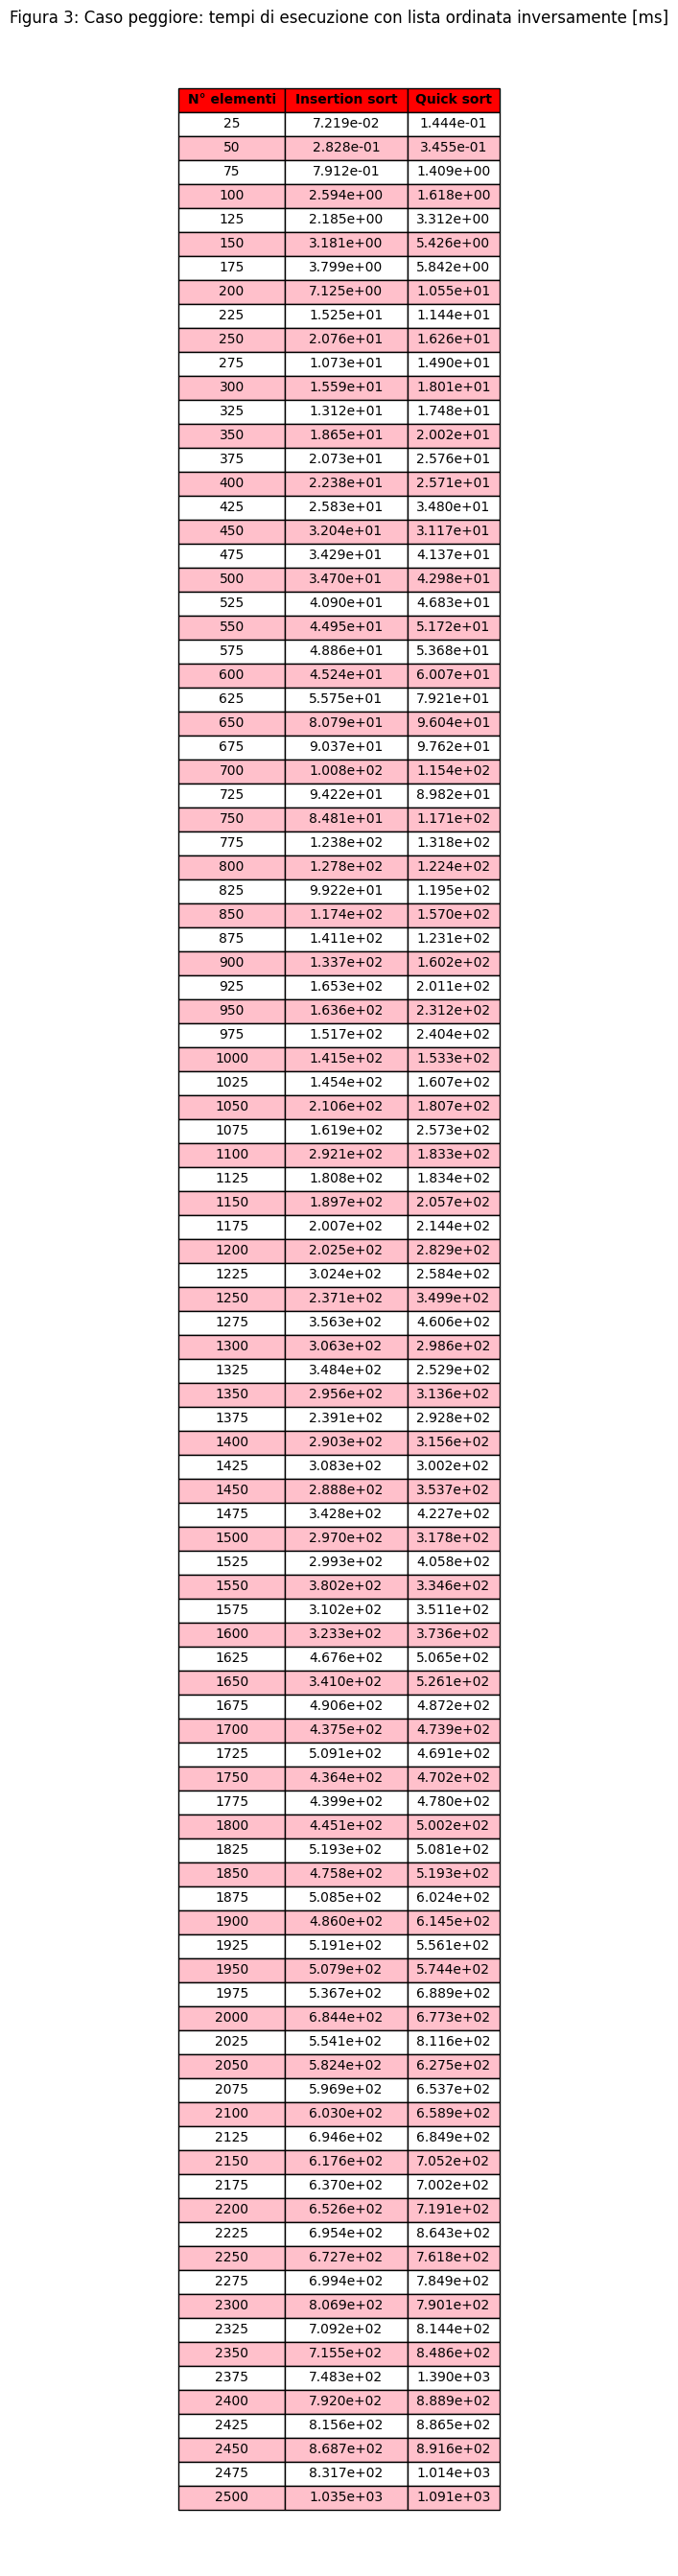

In [363]:
drawTable(WorstData, WorstTitle, "red", "pink")

# Generazione dei grafici

Funzioni per la generazione dei grafici:
- **drawSideGraphs** disegna a sinistra i tempi di Insertion sort e a destra di Quick sort
- **drawPlotComparison** disegna nello stesso grafico con colori diversi i tempi di Insertion sort e di Quick sort

In [364]:
# Parametri per il disegno dei grafici
x_axis = [i for i in range(step, step * (nTests + 1), step)]
label1, color1 = "Insertion Sort", "darkgreen"
label2, color2 = "Quick sort", "blue"
xlabel, ylabel = "Dimensione dell'array (n)", "Tempo di esecuzione [ms]"
legend1, legend2 = mpatch.Patch(label=label1, color=color1), mpatch.Patch(label=label2, color=color2)

In [365]:
def drawSideGraphs(left_data, right_data, plot_title):
    fig, (left, right) = plt.subplots(1, 2, figsize=(15, 5))

    # Insertion sort, grafico a sinistra
    left.plot(x_axis, left_data, color=color1)
    left.set_title(label1)
    left.set_xlabel(xlabel)
    left.set_ylabel(ylabel)
    left.legend(handles=[legend1])

    # Quick sort, grafico a destra
    right.plot(x_axis, right_data, color=color2)
    right.set_title(label2)
    right.set_xlabel(xlabel)
    right.set_ylabel(ylabel)
    right.legend(handles=[legend2])

    fig.suptitle(plot_title, fontsize=16)
    plt.show()

In [366]:
def drawPlotComparison(data1, data2, title):
    graph, plot = plt.subplots(1,1, figsize=(15,12))
    plot.plot(x_axis, data1, label=label1, color=color1)
    plot.plot(x_axis, data2, label=label2, color=color2)
    plot.set_title(title)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plot.legend(handles=[legend1, legend2])
    
    plt.show()

### Grafici caso medio

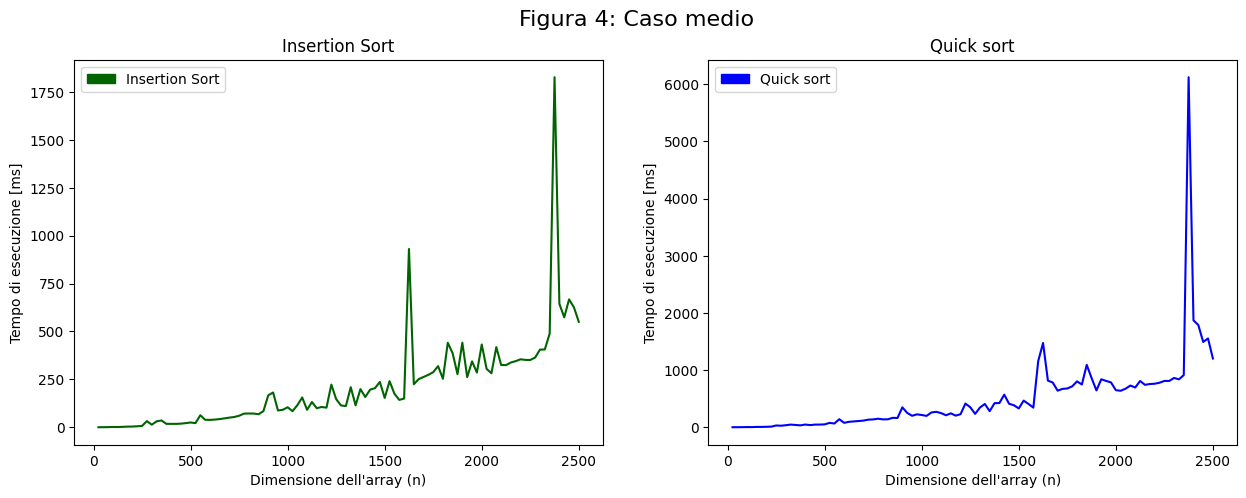

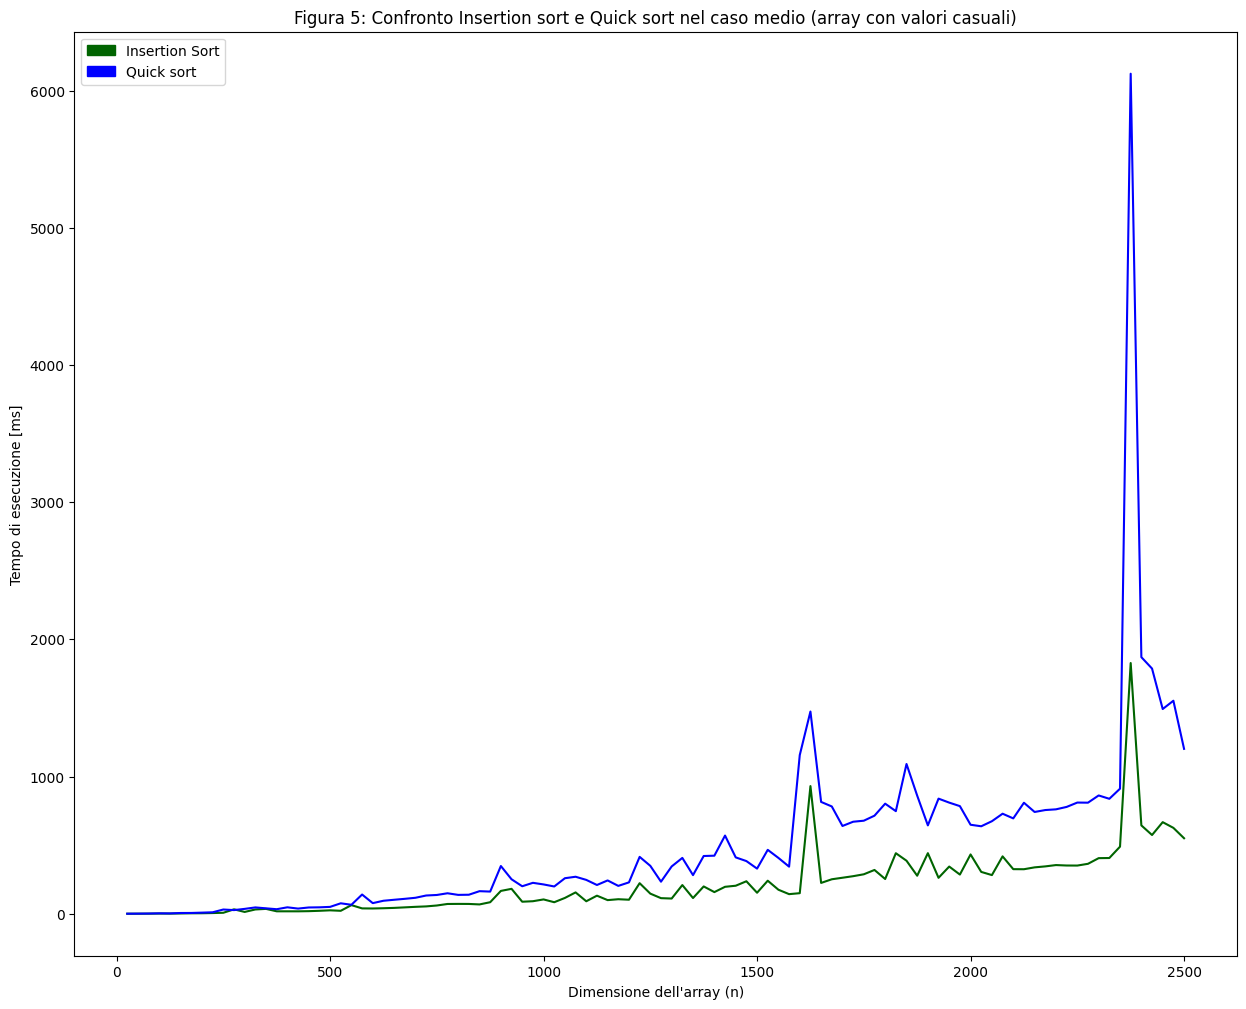

In [367]:
drawSideGraphs(AverageTimesInsertion, AverageTimesQuick, "Figura 4: Caso medio")
drawPlotComparison(AverageTimesInsertion, AverageTimesQuick, "Figura 5: Confronto Insertion sort e Quick sort nel caso medio (array con valori casuali)")

### Grafici caso migliore

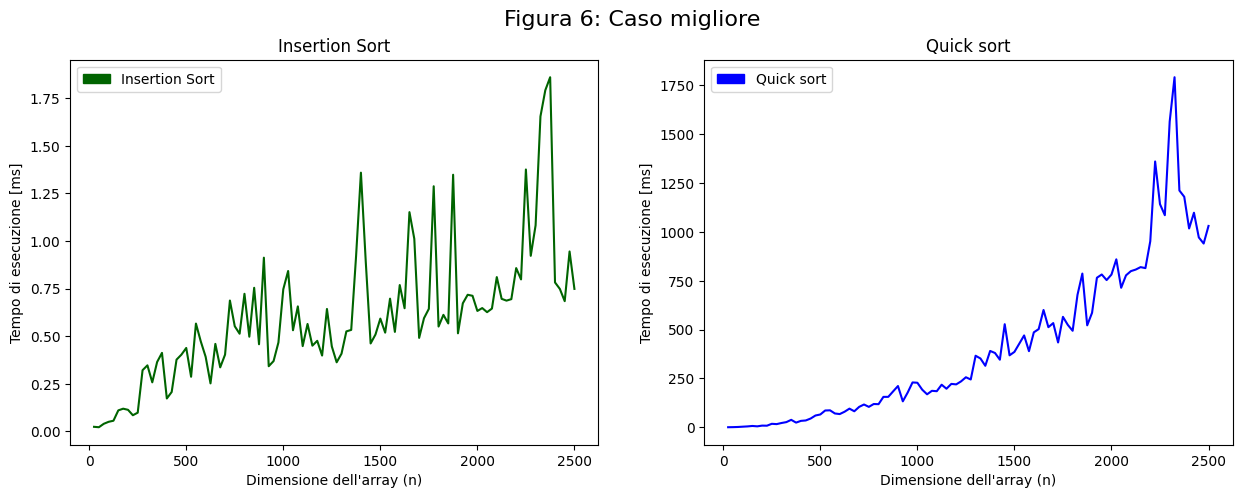

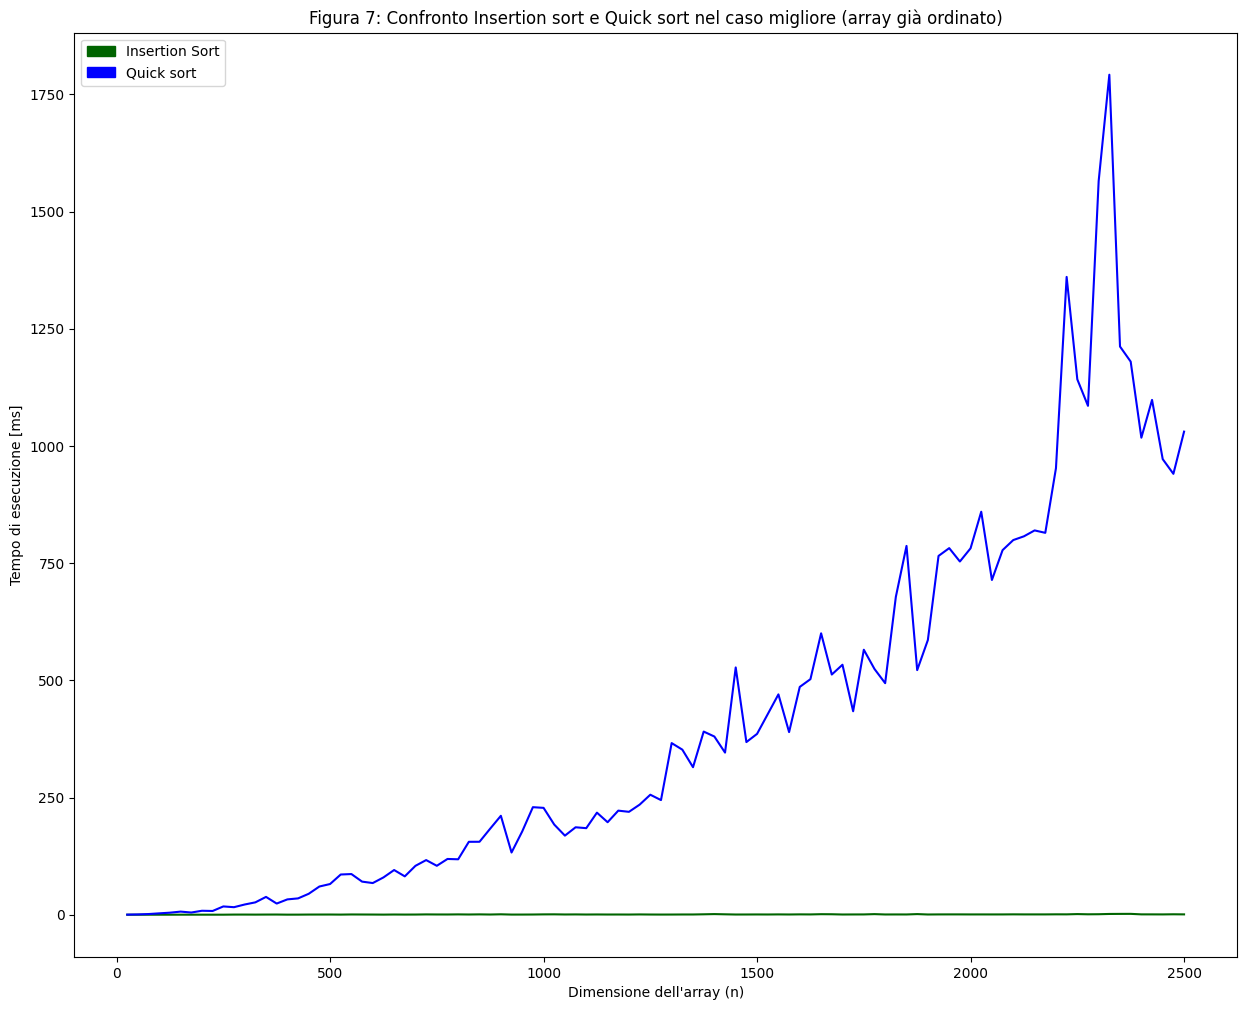

In [368]:
drawSideGraphs(BestTimesInsertion, BestTimesQuick, "Figura 6: Caso migliore")
drawPlotComparison(BestTimesInsertion, BestTimesQuick, "Figura 7: Confronto Insertion sort e Quick sort nel caso migliore (array già ordinato)")

### Grafici caso peggiore

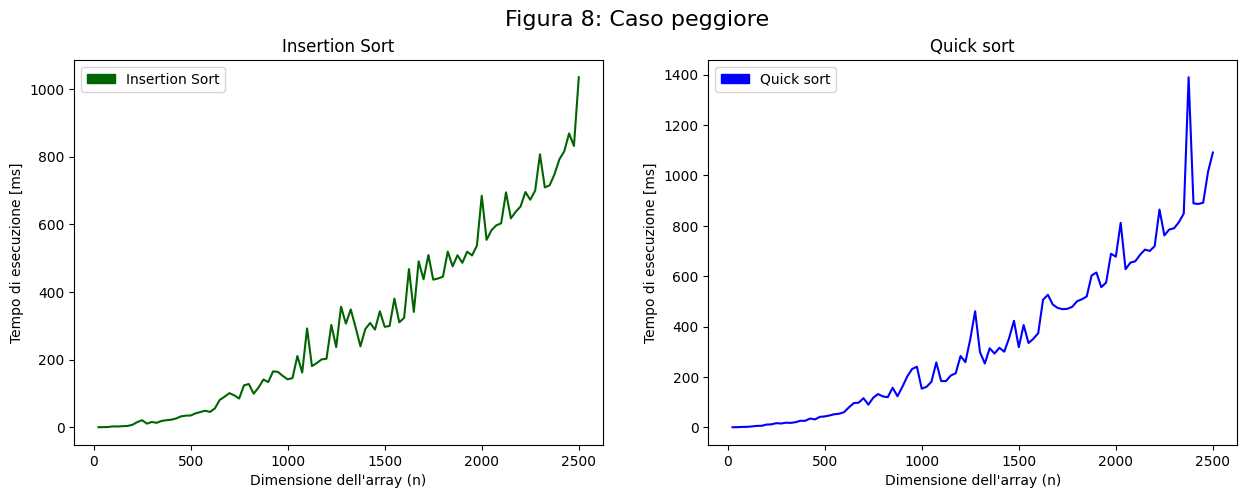

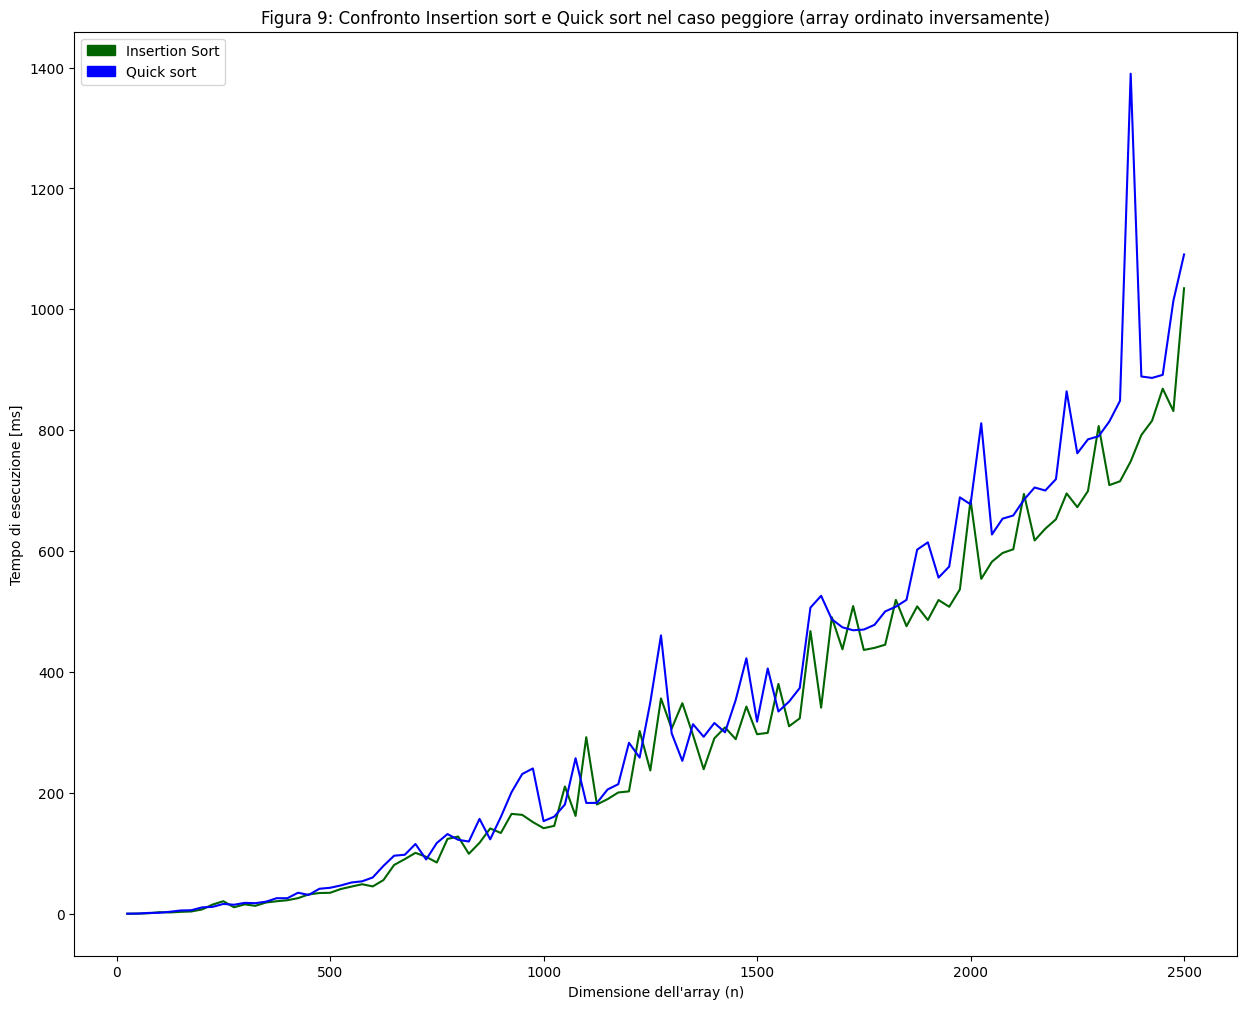

In [369]:
drawSideGraphs(WorstTimesInsertion, WorstTimesQuick, "Figura 8: Caso peggiore")
drawPlotComparison(WorstTimesInsertion, WorstTimesQuick, "Figura 9: Confronto Insertion sort e Quick sort nel caso peggiore (array ordinato inversamente)")

In [370]:
# Osservazioni finali